In [2]:
import numpy as np
import nest
import nest.raster_plot
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
nest.ResetKernel()
nest.resolution = 0.01 # 10 us = minimum audible angle (MAA) increment of 1.25°


Jun 08 12:14:12 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.01 ms.


# Inputs

In [7]:
freq_res = 4
freq = np.arange(20,14020,freq_res)
print(freq)
print(len(freq))
tone = 200

[   20    24    28 ... 14008 14012 14016]
3500


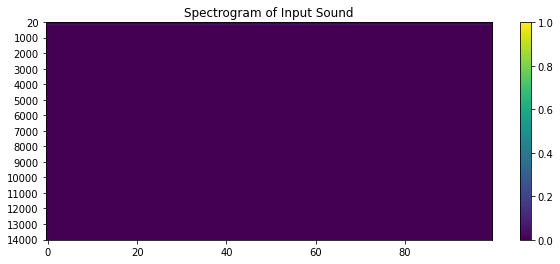

In [8]:
spectro = np.zeros((3500,100))
spectro[np.where(freq == tone),:] = 1
plt.figure(figsize=(10,4))
plt.title("Spectrogram of Input Sound")
plt.yticks(ticks = np.concatenate(([0], np.arange(245,3500,250))), labels = np.concatenate(([20], freq[np.arange(245,3500,250)])))
im = plt.imshow(spectro, aspect = 'auto')
plt.colorbar(im)

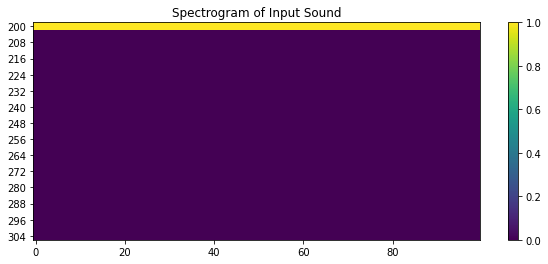

In [9]:
zoom_start = tone
zoom_end = tone + 108
zoom_spectro = spectro[np.where(freq==zoom_start)[0][0]:np.where(freq==zoom_end)[0][0],:]
zoom_ticks = np.arange(0,len(zoom_spectro), 2)
zoom_labels = np.arange(zoom_start,zoom_end,8)
plt.figure(figsize=(10,4))
plt.title("Spectrogram of Input Sound")
plt.yticks(ticks = zoom_ticks, labels = zoom_labels)
im = plt.imshow(zoom_spectro, aspect = 'auto')
plt.colorbar(im)


In [6]:
angle = -90
w_head = 22 #cm
v_sound = 33000 #cm/s
delta_x = (w_head*np.sin(np.deg2rad(angle)))
itd = 1000*delta_x/v_sound #ms
ipds = 2*np.pi*itd*freq/1000
ild = angle*2/9
print("source angle:", angle,"°")
print("ITD:", itd, "ms")
print("frequencies:", freq, "Hz")
print("IPDs:", ipds, "rad")
print("ILD:", ild, "dB")


source angle: -90 °
ITD: -0.6666666666666666 ms
frequencies: [   20    24    28 ... 14008 14012 14016] Hz
IPDs: [ -0.0837758   -0.10053096  -0.11728613 ... -58.67657319 -58.69332835
 -58.71008351] rad
ILD: -20.0 dB


# Populations

In [7]:
n_ANFs = 35000
mean_rate = 0
mean_amplitude = 1000

In [8]:
if(angle>=0):
    r_ANFs = nest.Create('sinusoidal_poisson_generator',n_ANFs,
                params={'frequency': np.repeat(freq, 10),
                        'phase': np.repeat(np.rad2deg(ipds),10)})
    l_ANFs = nest.Create('sinusoidal_poisson_generator',n_ANFs,
                params={'frequency': np.repeat(freq, 10),
                    'phase': 0})
    mean_amplitude_l = mean_amplitude/(10**(abs(ild)/20))
    mean_amplitude_r = mean_amplitude
else:
    r_ANFs = nest.Create('sinusoidal_poisson_generator',n_ANFs,
                params={'frequency': np.repeat(freq, 10),
                        'phase': np.repeat(np.rad2deg(ipds),10)})
    l_ANFs = nest.Create('sinusoidal_poisson_generator',n_ANFs,
                params={'frequency': np.repeat(freq, 10),
                        'phase': 0})
    mean_amplitude_r = mean_amplitude/(10**(abs(ild)/20))
    mean_amplitude_l = mean_amplitude
    

s_rec_r = nest.Create('spike_recorder')
s_rec_l = nest.Create('spike_recorder')

nest.Connect(r_ANFs, s_rec_r, 'all_to_all')
nest.Connect(l_ANFs, s_rec_l, 'all_to_all')


In [9]:
def input_set_up(spectro, ms): 
    for r in range(0, len(spectro)-1):
            if spectro[r][ms] > 0:
                r_ANFs[10*r:10*(r+1)].set(amplitude = spectro[r][ms]*mean_amplitude_r)
                l_ANFs[10*r:10*(r+1)].set(amplitude = spectro[r][ms]*mean_amplitude_l)

In [10]:
for i in range(100):
    input_set_up(spectro,i)
    nest.Simulate(1)


Mar 07 09:27:52 NodeManager::prepare_nodes [Info]: 
    Preparing 70002 nodes for simulation.

Mar 07 09:27:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 70002
    Simulation time (ms): 1
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 07 09:27:52 SimulationManager::run [Info]: 
    Simulation finished.

Mar 07 09:27:52 NodeManager::prepare_nodes [Info]: 
    Preparing 70002 nodes for simulation.

Mar 07 09:27:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 70002
    Simulation time (ms): 1
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 07 09:27:52 SimulationManager::run [Info]: 
    Simulation finished.

Mar 07 09:27:52 NodeManager::prepare_nodes [Info]: 
    Preparing 70002 nodes for simulation.

Mar 07 09:27:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 70002
    Simulation time (ms): 1
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 07 09:2

In [11]:
np.unique(s_rec_l.get('events')['senders'], return_counts = True)

(array([35201, 35202, 35203, 35204, 35205, 35206, 35207, 35208, 35209,
        35210]),
 array([30, 32, 24, 40, 36, 27, 27, 35, 36, 34]))

In [12]:
np.unique(s_rec_r.get('events')['senders'], return_counts = True)

(array([201, 203, 204, 205, 206, 207, 208, 209, 210]),
 array([1, 4, 1, 8, 3, 6, 3, 3, 5]))

In [13]:
l_ANFs[201].get('amplitude')

1000.0

In [14]:
r_ANFs[201].get('amplitude')

100.0

Angle: -90 °



Text(0.5, 0, 'Time [ms]')

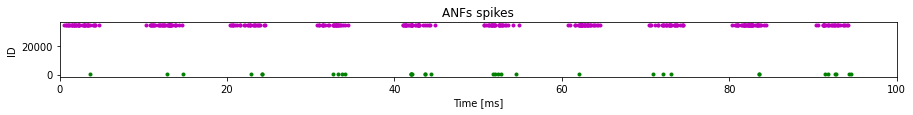

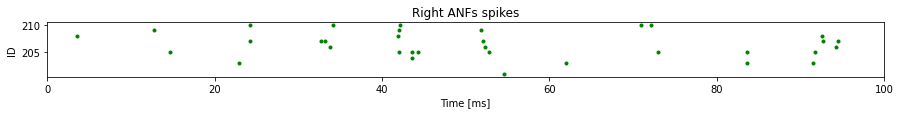

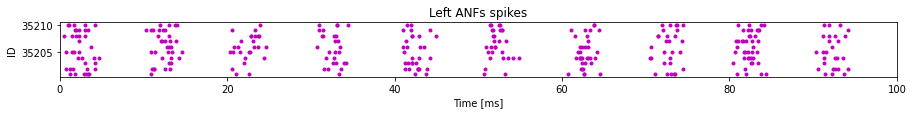

<Figure size 1080x72 with 0 Axes>

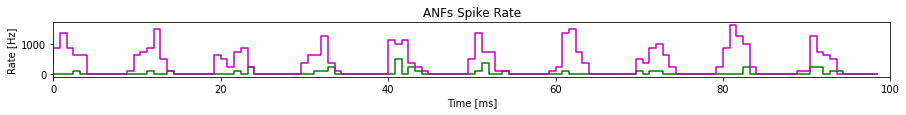

In [16]:
bin_dim = 0.8 #ms

data_r = s_rec_r.get('events')
data_l = s_rec_l.get('events')

print("Angle:", angle, "°\n")

plt.figure(figsize=(15, 1))
plt.plot(data_r['times'], data_r['senders'], ".", color = 'g')
plt.plot(data_l['times'], data_l['senders'], ".", color = 'm')
plt.xlim(0,100)
plt.title("ANFs spikes")
plt.ylabel("ID")
plt.xlabel("Time [ms]")

plt.figure(figsize=(15, 1))
plt.plot(data_r['times'], data_r['senders'], ".", color = 'g')
plt.xlim(0,100)
plt.title("Right ANFs spikes")
plt.ylabel("ID")
plt.xlabel("Time [ms]")

plt.figure(figsize=(15, 1))
plt.plot(data_l['times'], data_l['senders'], ".", color = 'm')
plt.xlim(0,100)
plt.title("Left ANFs spikes")
plt.ylabel("ID")
plt.xlabel("Time [ms]")

plt.figure(figsize=(15, 1))
rate_r = np.zeros(int(100/bin_dim)-1)
rate_l = np.zeros(int(100/bin_dim)-1)
for i in range(10):
    t_r = data_r['times'][np.where(data_r['senders']==np.where(freq==tone)[0][0]*10+1+i)]
    t_l = data_l['times'][np.where(data_l['senders']==35000+np.where(freq==tone)[0][0]*10+1+i)]
    s_r, bins = np.histogram(t_r, np.arange(0,100,bin_dim))
    s_l, bins = np.histogram(t_l, np.arange(0,100,bin_dim))
    rate_r = rate_r + s_r
    rate_l = rate_l + s_l
rate_r = rate_r/10
rate_l = rate_l/10
plt.figure(figsize=(15, 1))
plt.step(bins[:-1], rate_r*1000/bin_dim, color = 'g')
plt.step(bins[:-1], rate_l*1000/bin_dim, color = 'm')
plt.xlim(0,100)
plt.title("ANFs Spike Rate")
plt.ylabel("Rate [Hz]")
plt.xlabel("Time [ms]")